<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GB886_Week_4_Assignment_4_(Prediciting_Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Churn

### **Initial Setup:**

In [202]:
### Import Needed Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [203]:
### Import Github repo
! git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

fatal: destination path 'MSDIA_PredictiveModelingAndMachineLearning' already exists and is not an empty directory.


In [204]:
### Import and read data into df
Churn_DF = pd.read_csv("/content/MSDIA_PredictiveModelingAndMachineLearning/GB886_IV_15_TelCoChurn.csv")

In [205]:
### View Data Dimensions
# Churn_DF.shape

In [206]:
### View Data
Churn_DF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
### View Data Types
# Churn_DF.info()

In [208]:
### View Stats on Data
# Churn_DF.describe()

In [209]:
### Check Distribution of Churn Field
Churn_DF['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


### **Prepare For Modeling:**

In [210]:
### convert Total Charges Field to Float
Churn_DF['TotalCharges'] = pd.to_numeric(Churn_DF['TotalCharges'], errors= 'coerce') # errors='coerce' will replace invalid values with NaN.

In [211]:
### Check for nulls in newly converted TotalCharges Field
print(Churn_DF['TotalCharges'].isnull().sum())
# Find average total charge
avg_total_charge = np.mean(Churn_DF['TotalCharges'])
# Impute Nulls in Total Charges Field with avg total charge
Churn_DF['TotalCharges'] = Churn_DF['TotalCharges'].fillna(avg_total_charge)
# Check to see if nulls are gone
print(Churn_DF['TotalCharges'].isnull().sum())

11
0


In [212]:
### Grab Object Fields and convert them to dummy variables
obj_fields = Churn_DF.select_dtypes(include = ['object'])

# Adding senior citizen back to the df, and converting to a factor datatype
obj_fields['SeniorCitizen'] = Churn_DF['SeniorCitizen'].astype("category")

# Convert Object Fields to dummies
Dummy_Fields = pd.get_dummies(
    data = obj_fields,
    dtype = 'int64',
    drop_first = True
)

In [213]:
### Create Copy of Churn_DF
Churn_DF_Modeling = Churn_DF.copy()

# Drop all obj datatype fields from DF
Churn_DF_Modeling.drop(columns = obj_fields, inplace = True)

# Add Back dummy version of dropped fields
Churn_DF_Final = pd.concat([Churn_DF_Modeling,Dummy_Fields], axis = 1)

In [214]:
### Rename Churn Field
Churn_DF_Final.rename(
    columns= {
        'Churn_Yes' : 'Churn'
    }, inplace = True
)

### View Final Churn DF that will be used for modeling
# Churn_DF_Final.head()

### Modeling (Fit + Interpretation):

In [215]:
### Set Target and Feature Variables
# Target
Y = Churn_DF_Final['Churn']
# Features
X = Churn_DF_Final.drop(columns = 'Churn')
# Add Constant to Features
X = sm.add_constant(X)

In [216]:
### Fit Model and Show Summary
Churn_Logit = sm.Logit(Y,X) ### Logit link function
Churn_Logit_Res = Churn_Logit.fit() ### Fit model (Maximizes the log likelihood function to estimate Beta(s) that provide the best estime for P(x))

### Show Model Summary
print(Churn_Logit_Res.summary())


Optimization terminated successfully.
         Current function value: 0.413899
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           23
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                  0.2847
Time:                        10:45:02   Log-Likelihood:                -2915.1
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8170   5.2

**<u>Model Interpretation:</U>**

* Statsmodel was successfuly able to maximize the log likelihood function and find the optimal paramters (B0, B1, B2, etc...) in only 9 iterations.
* The Pseudo R-squared sits at 0.2847, indicating that about 28.47% of the variation in Y (Churn) is explained by the model.
* When interpeting some of the beta coefficients, some key highlights we noticed are:
  * Tenure has a statistically significant negative association with Churn (for every unit change in tenure, the log odds of churning decreases by -0.0585). In terms of odds, the odds of churning decreases by a factor of e^-0.0585 (0.9431) which is about 5.7%.
  * Multiple_Lines_Yes has a statistically significant positive association with Churn (if a customer has multiple lines of business, the log odds of churning increases by 0.4468). In terms of odds, the odds of churning increases by a factor of e^0.4468 (1.5633) which is about 56.33%!
  * Contract_Two year has a significant negative association with Churn (if a customer has a two year contract with the business, the log odds of churning decreases by -1.3962). In terms of odds, the odds of churning decreases by a factor of e^-1.3962 (0.2475) which is about 24.75%.

Overall, the model output provides a look into which variables may be the key drivers of predicting churn.


### **Model Validation:**

#### Calibration Plot

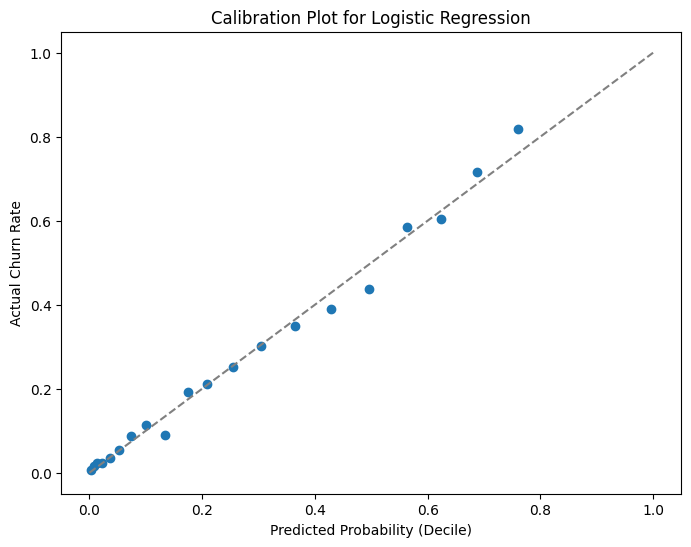

In [217]:
### Calibration Plot
Churn_DF_Final['P_Churn'] = Churn_Logit_Res.predict()
Churn_DF_Final['decile'] = pd.qcut(Churn_DF_Final['P_Churn'], 20, labels=False) ### 20 is the total decile groups created (segments)

# Calculate the average predicted probability and actual default rate for each decile
decile_stats = Churn_DF_Final.groupby('decile').agg({'P_Churn': 'mean', 'Churn': 'mean'})

# Scatterplot of predicted probabilities vs actual default rates
plt.figure(figsize=(8, 6))
plt.scatter(decile_stats['P_Churn'], decile_stats['Churn'])
plt.xlabel('Predicted Probability (Decile)')
plt.ylabel('Actual Churn Rate')
plt.title('Calibration Plot for Logistic Regression')

# Add a line with slope 1
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.show()

**<u>Notes:</u>**

The points on the Calibration plot at first move along the straight line, but then begins to deviate a bit the higher the predicted probability decile.

####Chi-Squared Test

In [218]:
# Calculate observed and expected frequencies for each decile
observed = Churn_DF_Final.groupby('decile')['Churn'].sum()
expected = Churn_DF_Final.groupby('decile')['P_Churn'].sum()

# Calculate the Chi-squared statistic
xs_statistic = np.sum((observed - expected)**2 / expected)

# Degrees of freedom (number of groups - 1)
df = 20 - 1

# Calculate the p-value
from scipy.stats import chi2
p_value = 1 - chi2.cdf(xs_statistic, df)

print("Chi-squared Statistic:", xs_statistic)
print("P-value:", p_value)

Chi-squared Statistic: 21.923864943142497
P-value: 0.28806176855401733


<u>**Notes:**</u>

We note that the p_value of the chi-squared test is > 0.05, meaning we accept the null hypothesis that this model has a good fit on the data. Even with some of the deviations we are seeing in the calibration plot on some of the points, we still can accept that this model is indeed a good overall fit on the data.

### **Confusion Matrix/ROC Curve:**

#### Confusion Matrix

In [219]:
### Confusion Matrix
Churn_Logit_Res.pred_table(threshold= 0.5) ### 50% Cuttoff

array([[4650.,  524.],
       [ 835., 1034.]])

In [220]:
### Confusion Matrix Key Metrics at 0.5 cuttoff
FP = 524
FN = 835
TP = 1034
TN = 4650
Tot_Positives = FN + TP
Tot_Negatives = FP + TN
N_Plus_P = Tot_Positives + Tot_Negatives

MCR = (FP + FN)/N_Plus_P
TPR = TP/Tot_Positives  ### Out of all positive cases (FN and TP), what % where accurately labeled positive
TNR = TN/Tot_Negatives
precision = TP/(TP + FP) ### Out of all cases labeled Positive (TP and FP) what % were accurately labeled positive

print(f"The Misclassified Rate is: {MCR * 100:.2f}%")
print(f"The True Positive Rate (Sensitivity or Recall) is: {TPR * 100:.2f}%")
print(f"The True Negative Rate (Specifity) is: {TNR * 100:.2f}%")
print(f"The Precision is: {precision * 100:.2f}%")

The Misclassified Rate is: 19.30%
The True Positive Rate (Sensitivity or Recall) is: 55.32%
The True Negative Rate (Specifity) is: 89.87%
The Precision is: 66.37%


In [221]:
### Store Preditions
Churn_Predict = Churn_Logit_Res.predict()

In [222]:
### Further Classification Metrics
# Convert probabilities to 0/1 labels (using 0.5 threshold)
Churn_Predict_labels = (Churn_Predict >= 0.5).astype(int)

# print report
print(classification_report(Y, Churn_Predict_labels))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5174
           1       0.66      0.55      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.73      0.74      7043
weighted avg       0.80      0.81      0.80      7043



**<u>Notes:</u>**

When evaluating the confusion matrix, we see that the misclassification rate sits at 19.3% coupled with True Positive (Recall) and Negative rates of 55.32% and 89.87%. In a real world scenario, this would be considered decent accuracy, especially for a churn model. One thing to note, is that there is a bit of a class unbalance in the original data set regarding the churn field, which could be playing a role in the lower true positive rate.

#### ROC Curve:

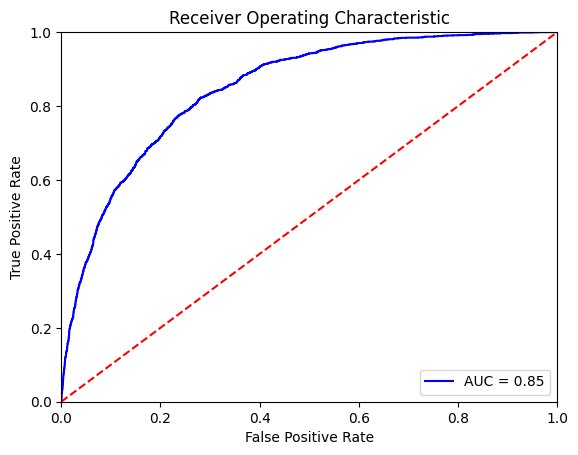

In [223]:
### Show ROC Curve at Various Thresholds
fpr, tpr, threshold = roc_curve(Y, Churn_Predict)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**<u>Notes:</u>**

We see generally as the false positive rate increases (due to us lowering our classification threshold), we generally get a good bump in our true positive rate as we move through the curve. The total area under the curve sits at 85%. Overall, this is more confirmation that our model is performing well.

In [224]:
### Find the optimal classification threshold
# Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr  ### Sensitivity - Specificity

# Find the optimal threshold (maximizing Youden's J)
optimal_idx = np.argmax(youden_j)
optimal_threshold = threshold[optimal_idx]

# Print results
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Youden's J Statistic: {youden_j[optimal_idx]}")

Optimal Threshold: 0.2558857993208347
Youden's J Statistic: 0.5421622869254284


### **<u>Final Notes:</u>**

Overall:

This type of model would be usefull in predicting the probability of customer churn for a business. For the business to know what optimal cutoff to use when attempting to classify guests under churn or no churn, one can either play around with the confusion matrix threshold until they find a cuttoff that balances prediction error and accuracy, or, you can use Youden's J statsitic method, which finds the point on the ROC curve that gives us the optimal threshold that maximizes the difference between Sensitivity and Specificity.
<br>
<br>
As a final note: As mentioned earlier, there is a bit of a class imbalance in the Target Variable:

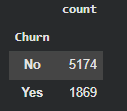

This may be impacting the metrics such as the Sensitivity score (the model was fitted mostly on observations that did not churn and thereby, it may have a more difficult time recognizing the attributes of a customer that could potentially churn in the future, resulting in a potential false negative). To combat this, I would probably incorporate some form of resampling method on the data to balance out my classes.
